In [41]:
#Imports
import numpy as np
from math import exp, log, e, sqrt
from ipywidgets import interact
from PIL import Image
import matplotlib.pyplot as plt




In [ ]:

N=int(input('What is the length of one side of your grid?'))
M=N #Grid is even. playing with an uneven grid might be fun.

J=int(input('What is the Coupling constant? 1 is most common. '))

kT= float(input('What is your Temperature from 0~6? For critical temperature type 22  '))

if kT==22:
    kT = 2 / log(1 + sqrt(2), e)#critical temp
    print('Critical temperature is given as 2 / log(1 + sqrt(2), e), or', kT, 'and will be used for this system. ')


Mag=[]#Places to store magnetization  values
Energy=[] #Places to store energy values


In [32]:
# ================= create the random spin grid========================

# Each spin has two possible states +1 or −1.


def Initial_Lattice(N,M):
    Spinvalues=[-1,1]
    return np.random.choice(Spinvalues, size=(N, M))




#Here we save it so we can do some calculations from the starting point.

Grid=Initial_Lattice(N,M)

In [33]:
#=========Calculates Magnetization of the grid based on the formula  ..........======

def magnetization(Lattice):
    m = 0.0  
    for j in range(0,N):
        for k in range(0,M):  
            m += Lattice[j,k]
  
    return m
magnetization(Grid)

154.0

In [34]:
#========================================= Calculating energy based on formula=================
def Energy_Of_The_System(Lattice):
    E=0.0
 
    
    for i in range(0,N):
        for j in range(0,M):
            
            Spin= Lattice[i, j] #choosen spin
    
    
            SumOfNeighbors= (Lattice[(i+1)%N, (j)]#Right
                     + Lattice[(i-1)%N, (j)]#left
                     + Lattice[(i) , (j+1)%M]#Up
                     + Lattice[(i) , (j-1)%M])#Down
                     
    
            E+=J*Spin*SumOfNeighbors
        
    #print('The total energy of the system is', E)
    return E
Energy_Of_The_System(Grid)

64.0

In [35]:
#===================Using Energy calculation to find DeltaE and determine spin flips=====================

def EnergyCalc(Lattice, i, j):
    
    
    N, M = Lattice.shape
    
    
    Spin= Lattice[i, j] 
    
    
    SumOfNeighbors= (Lattice[(i+1)%N, (j)]#Right
                     + Lattice[(i-1)%N, (j)]#left
                     + Lattice[(i) , (j+1)%M]#Up
                     + Lattice[(i) , (j-1)%M])#Down
                     
    
    
    
    dE = (2*J)*(Spin*SumOfNeighbors) 
                   
                   
    if dE <= 0 or exp(-dE / kT) > np.random.random():
        Lattice[i, j] *= -1

In [36]:
#=================================== Movement through the lattice ==============
#This is the simplest case, but experimenting with other iterations over the grid can lead to changed results.

#I've found going randomly across the lattice caused the grid to continue to be random. 
#there might be a proper way to do this, but I've not found it.

#The coordinates of this movement type for a 3x3 Lattice is commented in the cell below if interested. 


def Movement(Lattice):
    N, M = Lattice.shape

    for i in range(N):
        for j in range(M): 
            EnergyCalc(Lattice, i, j)
            
#=========== Calls and saves values for measurements while the grid is being updated============            
            
    Mag.append(magnetization(Lattice))
    Energy.append(Energy_Of_The_System(Lattice))
    return Lattice

In [37]:
#X_Coordinates=[0, 1, 2, 0, 1, 2, 0, 1, 2]
#Y_Coordinates=[0, 0, 0, 1, 1, 1, 2, 2, 2]

Thanks to https://jakevdp.github.io/blog/2017/12/11/live-coding-cython-ising-model/ for the visualization tutorial

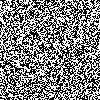

In [38]:
#----------------------Visualize the Grid-------------------------------
def Visualize(Lattice):
    return Image.fromarray(np.uint8((Lattice + 1) * 0.5 * 255))  # 0 ... 255
Visualize(Grid)

In [39]:
N_Frames=50

from ipywidgets import interact

def Evolution(images):
    
    
    def show(frame=(0, len(images)-1)):
        
        
        return Visualize(images[frame])
    
    
    return interact(show)





images = [Grid]


for i in range(N_Frames):
    
    images.append(Movement(images[-1].copy()))
    
Evolution(images);

interactive(children=(IntSlider(value=25, description='frame', max=50), Output()), _dom_classes=('widget-inter…

In [40]:
FrameList=np.arange(0,len(Energy),1)

from plotly.subplots import make_subplots
import plotly.graph_objects as go

fig = make_subplots(
    rows=1, cols=2,
    specs=[[{"type": "bar"}, {"type": "pie"}],#I didn't change these. These specs just happend to work. Others don't
           ],
)

#Each fig.add_trace is a new graph
#Making traces on the same row and col allow them to be plotted together. 


#traces for Energy and Magnetization
fig.add_trace(go.Scatter(y=(Energy), name='Energy points(J)', mode='lines', marker_color='red'),row=1,col=1)
fig.add_trace(go.Scatter(y=(Mag), name='Magnetization(T)', mode='lines', marker_color='orchid'),row=1,col=1)
fig.update_layout(title='Evolution Data of The Ising Model',
                   xaxis_title='Frames',
                   yaxis_title='Quantity')

#Trace for the table
fig.add_trace(go.Table(
    header=dict(values=['Frame #','Energies', 'Magnetizations'],
                line_color='darkslategray',
                fill_color='lightskyblue',
                align='left'),
    cells=dict(values=[FrameList,Energy, Mag], # 2nd column
               line_color='darkslategray',
               fill_color='lightcyan',
               align='left')),row=1,col=2)            

fig.update_layout(width=1000, height=500, showlegend=True)

fig.show()
